# Plots in the Manuscript

[![Version](https://img.shields.io/badge/version-4.0-red?style=for-the-badge)](https://doi.org/10.1103/PhysRevA.106.043501)
[![Version](https://img.shields.io/badge/qom-v1.0.0-red?style=for-the-badge)](https://sampreet.github.io/qom-docs)

## Dependencies

In [1]:
# dependencies
import numpy as np
import os
import sys

# qom modules
from qom.solvers import HLESolver, QCMSolver
from qom.solvers.MeasureSolver import get_wigner_single_mode
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter
from qom.utils.looper import wrap_looper

# add path to local libraries
sys.path.append(os.path.abspath(os.path.join('../../..', 'entan_oem_mod')))
# import system
from systems.OptoElectroMechanical import OEM_20

# initialize logger
init_log()

MainThread               INFO    2023-06-25 23:58:28.579: (qom.ui.log) -------------------------------------------------Logger Initialized


## Figure 2

Time evolution of mechanical squeezing (red or light gray) and optoelectrical entanglement (blue or dark gray) in the presence of (a) only the laser modulation (dotted), (b) laser and spring constant modulation (dashed), (c) laser and voltage modulation (dashed dotted), and (d) all three types of modulations (solid).
The thin dashed black line represents the SQL for the mechanical variance.
The shaded regions represent high values of squeezing entanglement.
Other parameters (in units of $\omega_{b0}$) are $A_{l0} = 100$, $A_{l\pm} = 10$, $A_{v0} = 50$, $A_{v1} = 100$, $\Delta_{0} = 1$, $\gamma_{a} = 0.1$, $\gamma_{b} = 10^{−6}$, $\gamma_{c} = 10^{−2}$,
$g_{ab} = 10^{−3}$, $g_{bc} = 2 \times 10^{−4}$, $\Omega_{l} = 2$, $\Omega_{v} = 2$, $\Omega_{s} = 2$, $\omega_{c0} = 1.1$ and $\theta = 0.5$.

MainThread               INFO    2023-06-25 23:58:30.905: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-06-25 23:58:30.911: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.44403837502519167 0.03579924497056362


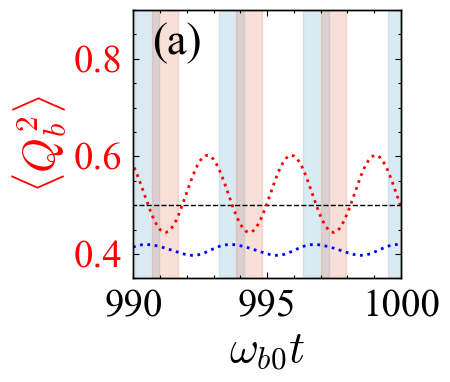

In [2]:
# all parameters
params = {
    'solver'    : {
        'show_progress' : True,
        'cache'         : False,
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 2),
        'method'        : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9371,
        't_range_max'   : 10001
    },
    'system'    : {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 0.0, 0.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.0,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter'   : {
        'type'                  : 'line',
        'x_label'               : '$\\omega_{b0} t$',
        'x_ticks'               : [990, 995, 1000],
        'x_ticks_minor'         : [990 + i for i in range(11)],
        'y_colors'              : ['k', 'r', 'b'],
        'y_sizes'               : [1, 2, 2],
        'y_styles'              : ['--', ':', ':'],
        'v_label'               : '$\\langle Q_{b}^{2} \\rangle$',
        'v_label_color'         : 'r',
        'v_limits'              : [0.35, 0.9],
        'v_tick_position'       : 'left-in',
        'v_ticks'               : [0.4, 0.6, 0.8],
        'v_ticks_minor'         : [0.35 + i * 0.05 for i in range(13)],
        'v_twin_label'          : '',
        'v_twin_label_color'    : 'b',
        'v_twin_limits'         : [0.015, 0.18],
        'v_twin_tick_labels'    : [''] * 3,
        'v_twin_tick_position'  : 'right-in',
        'v_twin_ticks'          : [0.03, 0.09, 0.15],
        'v_twin_ticks_minor'    : [0.015 + i * 0.015 for i in range(13)],
        'label_font_size'       : 32,
        'tick_font_size'        : 28,
        'width'                 : 4.6,
        'height'                : 4.0,
        'annotations'           : [{
            'text'  : '(a)',
            'xy'    : [0.33, 0.82]
        }],
        'vspan'                 : [
            {
                'xmin'  : 990.05,
                'xmax'  : 990.95,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 990.70,
                'xmax'  : 991.65,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 993.20,
                'xmax'  : 994.15,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 993.85,
                'xmax'  : 994.80,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 996.35,
                'xmax'  : 997.30,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 997.00,
                'xmax'  : 997.95,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 999.50,
                'xmax'  : 1000.0,
                'color' : 2,
                'alpha' : 0.25
            }
        ]
    }
}

# initialize system
system = OEM_20(
    params=params['system']
)

# initialize solver
hle_solver  = HLESolver(
    system=system,
    params=params['solver']
)
# get modes and correlations
Modes, Corrs, T = hle_solver.get_modes_corrs_times_in_range()
# get quantum correlation measures
Measures = QCMSolver(
    Modes=Modes,
    Corrs=Corrs,
    params=params['solver']
).get_measures()
# extract correlation
M_0 = Corrs[:, 2, 2]
# extract entanglement
M_1 = Measures[:, 0]
# output maximum squeezing and entanglement
print(np.min(M_0), np.max(M_1))

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
# plot correlation dynamics
plotter.update(
    xs=T,
    vs=[np.zeros(np.shape(T)) + 0.5, M_0]
)
# plot entanglement dynamics
plotter.update_twin_axis(
    xs=T,
    vs=M_1
)
# show
plotter.show(
    hold=True
)

MainThread               INFO    2023-06-25 23:58:34.278: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-06-25 23:58:34.285: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.39684602036573036 0.0331780116071503


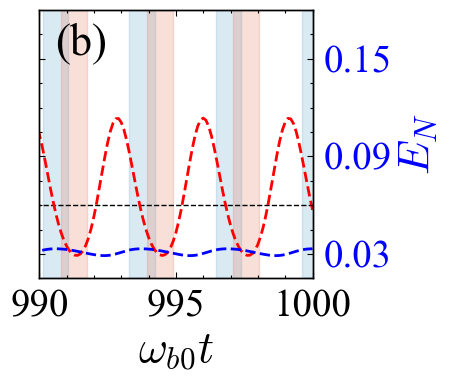

In [3]:
# all parameters
params = {
    'solver'    : {
        'show_progress' : True,
        'cache'         : False,
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 2),
        'method'        : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9371,
        't_range_max'   : 10001
    },
    'system'    : {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 0.0, 0.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.5,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter'   : {
        'type'                  : 'line',
        'x_label'               : '$\\omega_{b0} t$',
        'x_ticks'               : [990, 995, 1000],
        'x_ticks_minor'         : [990 + i for i in range(11)],
        'y_colors'              : ['k', 'r', 'b'],
        'y_sizes'               : [1, 2, 2],
        'y_styles'              : ['--', '--', '--'],
        'v_label'               : '',
        'v_label_color'         : 'r',
        'v_limits'              : [0.35, 0.9],
        'v_tick_position'       : 'left-in',
        'v_tick_labels'         : [''] * 3,
        'v_ticks'               : [0.4, 0.6, 0.8],
        'v_ticks_minor'         : [0.35 + i * 0.05 for i in range(13)],
        'v_twin_label'          : '$E_{N}$',
        'v_twin_label_color'    : 'b',
        'v_twin_limits'         : [0.015, 0.18],
        'v_twin_tick_position'  : 'right-in',
        'v_twin_ticks'          : [0.03, 0.09, 0.15],
        'v_twin_ticks_minor'    : [0.015 + i * 0.015 for i in range(13)],
        'label_font_size'       : 32,
        'tick_font_size'        : 28,
        'width'                 : 4.6,
        'height'                : 4.0,
        'annotations'           : [{
            'text'  : '(b)',
            'xy'    : [0.12, 0.82]
        }],
        'vspan'                 : [
            {
                'xmin'  : 990.15,
                'xmax'  : 991.05,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 990.80,
                'xmax'  : 991.75,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 993.30,
                'xmax'  : 994.25,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 993.95,
                'xmax'  : 994.90,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 996.45,
                'xmax'  : 997.40,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 997.10,
                'xmax'  : 998.05,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 999.60,
                'xmax'  : 1000.0,
                'color' : 2,
                'alpha' : 0.25
            }
        ]
    }
}

# initialize system
system = OEM_20(
    params=params['system']
)

# initialize solver
hle_solver  = HLESolver(
    system=system,
    params=params['solver']
)
# get modes and correlations
Modes, Corrs, T = hle_solver.get_modes_corrs_times_in_range()
# get quantum correlation measures
Measures = QCMSolver(
    Modes=Modes,
    Corrs=Corrs,
    params=params['solver']
).get_measures()
# extract correlation
M_0 = Corrs[:, 2, 2]
# extract entanglement
M_1 = Measures[:, 0]
# output maximum squeezing and entanglement
print(np.min(M_0), np.max(M_1))

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
# plot correlation dynamics
plotter.update(
    xs=T,
    vs=[np.zeros(np.shape(T)) + 0.5, M_0]
)
# plot entanglement dynamics
plotter.update_twin_axis(
    xs=T,
    vs=M_1
)
# show
plotter.show(
    hold=True
)

MainThread               INFO    2023-06-25 23:58:37.103: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-06-25 23:58:37.109: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.40547667053717185 0.124279931308093


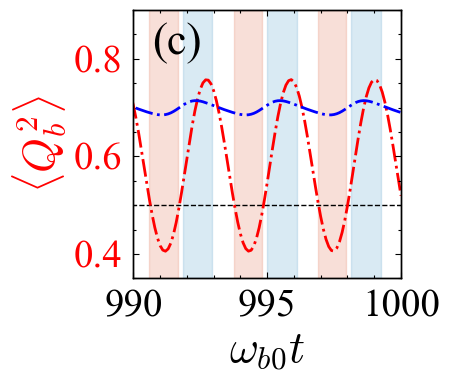

In [4]:
# all parameters
params = {
    'solver'    : {
        'show_progress' : True,
        'cache'         : False,
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 2),
        'method'        : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9371,
        't_range_max'   : 10001
    },
    'system'    : {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 50.0, 50.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.0,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter'   : {
        'type'                  : 'line',
        'x_label'               : '$\\omega_{b0} t$',
        'x_ticks'               : [990, 995, 1000],
        'x_ticks_minor'         : [990 + i for i in range(11)],
        'y_colors'              : ['k', 'r', 'b'],
        'y_sizes'               : [1, 2, 2],
        'y_styles'              : ['--', '-.', '-.'],
        'v_label'               : '$\\langle Q_{b}^{2} \\rangle$',
        'v_label_color'         : 'r',
        'v_limits'              : [0.35, 0.9],
        'v_tick_position'       : 'left-in',
        'v_ticks'               : [0.4, 0.6, 0.8],
        'v_ticks_minor'         : [0.35 + i * 0.05 for i in range(13)],
        'v_twin_label'          : '',
        'v_twin_label_color'    : 'b',
        'v_twin_limits'         : [0.015, 0.18],
        'v_twin_tick_labels'    : [''] * 3,
        'v_twin_tick_position'  : 'right-in',
        'v_twin_ticks'          : [0.03, 0.09, 0.15],
        'v_twin_ticks_minor'    : [0.015 + i * 0.015 for i in range(13)],
        'label_font_size'       : 32,
        'tick_font_size'        : 28,
        'width'                 : 4.6,
        'height'                : 4.0,
        'annotations'           : [{
            'text'  : '(c)',
            'xy'    : [0.33, 0.82]
        }],
        'vspan'                 : [
            {
                'xmin'  : 990.60,
                'xmax'  : 991.65,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 991.85,
                'xmax'  : 992.95,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 993.75,
                'xmax'  : 994.80,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 995.00,
                'xmax'  : 996.10,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 996.90,
                'xmax'  : 997.95,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 998.15,
                'xmax'  : 999.25,
                'color' : 2,
                'alpha' : 0.25
            }
        ]
    }
}

# initialize system
system = OEM_20(
    params=params['system']
)

# initialize solver
hle_solver  = HLESolver(
    system=system,
    params=params['solver']
)
# get modes and correlations
Modes, Corrs, T = hle_solver.get_modes_corrs_times_in_range()
# get quantum correlation measures
Measures = QCMSolver(
    Modes=Modes,
    Corrs=Corrs,
    params=params['solver']
).get_measures()
# extract correlation
M_0 = Corrs[:, 2, 2]
# extract entanglement
M_1 = Measures[:, 0]
# output maximum squeezing and entanglement
print(np.min(M_0), np.max(M_1))

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
# plot correlation dynamics
plotter.update(
    xs=T,
    vs=[np.zeros(np.shape(T)) + 0.5, M_0]
)
# plot entanglement dynamics
plotter.update_twin_axis(
    xs=T,
    vs=M_1
)
# show
plotter.show(
    hold=True
)

MainThread               INFO    2023-06-25 23:58:40.028: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-06-25 23:58:40.034: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.36541001674095513 0.12810831429078764


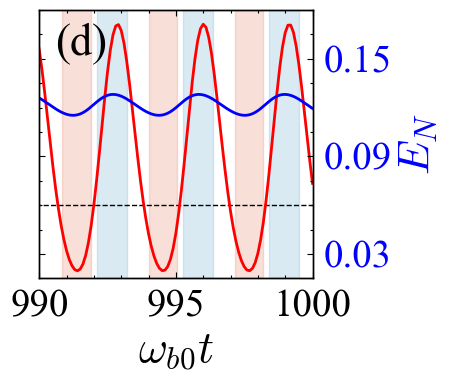

In [5]:
# all parameters
params = {
    'solver'    : {
        'show_progress' : True,
        'cache'         : False,
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 2),
        'method'        : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9371,
        't_range_max'   : 10001
    },
    'system'    : {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 50.0, 50.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.5,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter'   : {
        'type'                  : 'line',
        'x_label'               : '$\\omega_{b0} t$',
        'x_ticks'               : [990, 995, 1000],
        'x_ticks_minor'         : [990 + i for i in range(11)],
        'y_colors'              : ['k', 'r', 'b'],
        'y_sizes'               : [1, 2, 2],
        'y_styles'              : ['--', '-', '-'],
        'v_label'               : '',
        'v_label_color'         : 'r',
        'v_limits'              : [0.35, 0.9],
        'v_tick_position'       : 'left-in',
        'v_tick_labels'         : [''] * 3,
        'v_ticks'               : [0.4, 0.6, 0.8],
        'v_ticks_minor'         : [0.35 + i * 0.05 for i in range(13)],
        'v_twin_label'          : '$E_{N}$',
        'v_twin_label_color'    : 'b',
        'v_twin_limits'         : [0.015, 0.18],
        'v_twin_tick_position'  : 'right-in',
        'v_twin_ticks'          : [0.03, 0.09, 0.15],
        'v_twin_ticks_minor'    : [0.015 + i * 0.015 for i in range(13)],
        'label_font_size'       : 32,
        'tick_font_size'        : 28,
        'width'                 : 4.6,
        'height'                : 4.0,
        'annotations'           : [{
            'text'  : '(d)',
            'xy'    : [0.12, 0.82]
        }],
        'vspan'                 : [
            {
                'xmin'  : 990.85,
                'xmax'  : 991.90,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 992.10,
                'xmax'  : 993.20,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 994.00,
                'xmax'  : 995.05,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 995.25,
                'xmax'  : 996.35,
                'color' : 2,
                'alpha' : 0.25
            },
            {
                'xmin'  : 997.15,
                'xmax'  : 998.20,
                'color' : 8,
                'alpha' : 0.25
            },
            {
                'xmin'  : 998.40,
                'xmax'  : 999.50,
                'color' : 2,
                'alpha' : 0.25
            }
        ]
    }
}

# initialize system
system = OEM_20(
    params=params['system']
)

# initialize solver
hle_solver  = HLESolver(
    system=system,
    params=params['solver']
)
# get modes and correlations
Modes, Corrs, T = hle_solver.get_modes_corrs_times_in_range()
# get quantum correlation measures
Measures = QCMSolver(
    Modes=Modes,
    Corrs=Corrs,
    params=params['solver']
).get_measures()
# extract correlation
M_0 = Corrs[:, 2, 2]
# extract entanglement
M_1 = Measures[:, 0]
# output maximum squeezing and entanglement
print(np.min(M_0), np.max(M_1))

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
# plot correlation dynamics
plotter.update(
    xs=T,
    vs=[np.zeros(np.shape(T)) + 0.5, M_0]
)
# plot entanglement dynamics
plotter.update_twin_axis(
    xs=T,
    vs=M_1
)
# show
plotter.show(
    hold=True
)

Wigner distributions depicting the variation of squeezing with time in the presence of all three modulations.

MainThread               INFO    2023-06-25 23:58:42.977: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-06-25 23:58:45.790: (qom.solvers.MeasureSolver) ------------------------------------Wigners Obtained	


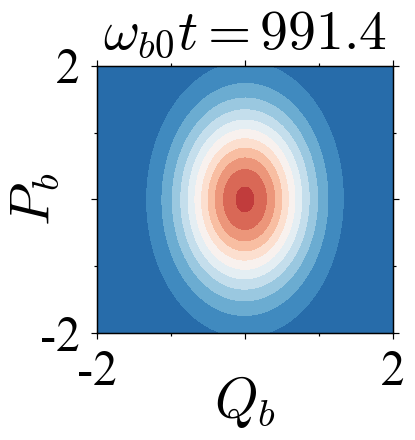

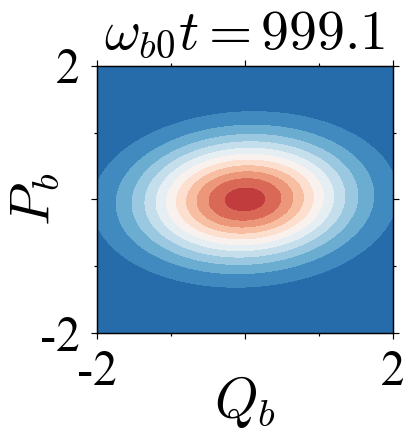

In [6]:
# parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'method'        : 'vode',
        'indices'       : [1],
        'wigner_xs'     : np.linspace(-2.0, 2.0, 401),
        'wigner_ys'     : np.linspace(-2.0, 2.0, 401),
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9900,
        't_range_max'   : 10001
    },
    'system': {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 50.0, 50.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.5,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter': {
        'type'              : 'contourf',
        'title'             : '$\\omega_{b0} t = 991.4$',
        'x_label'           : '$Q_{b}$',
        'x_label_pad'       : -16,
        'x_tick_labels'     : [-2, '', 2],
        'x_tick_position'   : 'both-out',
        'x_ticks'           : [-2, 0, 2],
        'x_ticks_minor'     : [-2, -1, 0, 1, 2],
        'y_label'           : '$P_{b}$',
        'y_label_pad'       : -16,
        'y_tick_labels'     : [-2, '', 2],
        'y_tick_position'   : 'both-out',
        'y_ticks'           : [-2, 0, 2],
        'y_ticks_minor'     : [-2, -1, 0, 1, 2],
        'show_cbar'         : False,
        'cbar_title'        : '$\\times 10^{-2}$',
        'cbar_ticks'        : [0.0, 0.025, 0.05],
        'cbar_tick_labels'  : ['0.0', '2.5', '5.0'],
        'label_font_size'   : 40,
        'tick_font_size'    : 35,
        'width'             : 4.25,
        'height'            : 4.5
    }
}

# initialize logger
init_log()

# initialize system
system = OEM_20(
    params=params['system']
)

# get modes and correlations
_, Corrs, T = HLESolver(
    system=system,
    params=params['solver']
).get_modes_corrs_times_in_range()
# get Wigner distributions
Wigners = get_wigner_single_mode(
    Corrs=Corrs,
    params=params['solver']
)

# plot squeezed Wigners
for i in [14, 91]:
    params['plotter']['title'] = '$\\omega_{b0} t = ' + str(T[i]) +'$'
    plotter = MPLPlotter(
        axes={
            'X': params['solver']['wigner_xs'],
            'Y': params['solver']['wigner_ys']
        },
        params=params['plotter']
    )
    plotter.update(
        vs=Wigners[i, 0]
    )
    plotter.show(
        hold=True
    )

## Figure 3

Maximum squeezing (red or light gray) and entanglement (blue or dark gray) with (a) variation in the voltage modulation frequency in the absence (dashed dotted) and presence (solid) of spring constant modulation, and variation in the (b) modulation amplitude and (c) modulation frequency of the spring constant in the absence (dashed) and presence (solid) of voltage modulation.
The thin dashed black line represents the SQL for the mechanical variance.
Other parameters are the same as in Fig. 2.

MainThread               INFO    2023-06-25 23:58:46.721: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-06-25 23:58:46.724: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2023-06-25 23:58:46.725: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-06-25 23:58:46.728: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


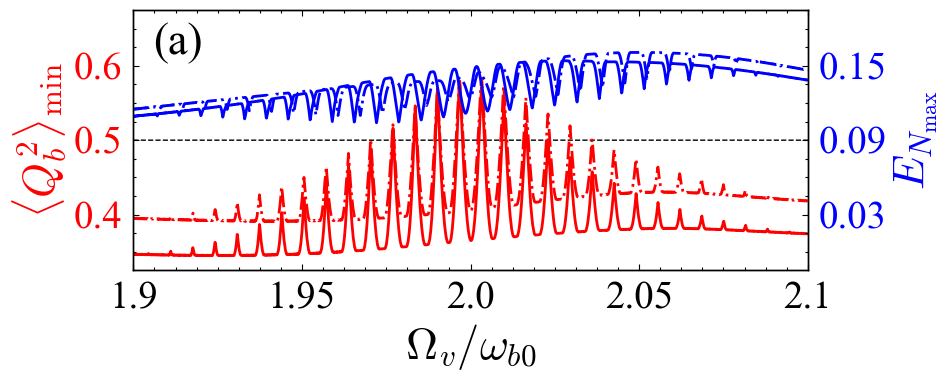

In [7]:
# all parameters
params = {
    'looper'    : {
        'show_progress' : True,
        'X' : {
            'var'   : 'Omegas',
            'idx'   : 1,
            'min'   : 1.9,
            'max'   : 2.1,
            'dim'   : 2001
        }
    },
    'solver'    : {
        'show_progress' : False,
        'cache'         : True,
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 2),
        'method'        : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9371,
        't_range_max'   : 10001
    },
    'system': {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 50.0, 50.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.5,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter'   : {
        'type'                  : 'lines',
        'x_label'               : '$\\Omega_{v} / \\omega_{b0}$',
        'x_ticks'               : [1.9, 1.95, 2.0, 2.05, 2.1],
        'x_ticks_minor'         : [1.9 + i * 0.00625 for i in range(33)],
        'y_colors'              : ['k'] + ['r'] * 2 + ['b'] * 2,
        'y_sizes'               : [1] + [2] * 4,
        'y_styles'              : ['--'] + ['-.', '-'] * 2,
        'v_label'               : '$\\langle Q_{b}^{2} \\rangle_{\\mathrm{min}}$',
        'v_label_color'         : 'r',
        'v_limits'              : [0.325, 0.675],
        'v_tick_position'       : 'left-in',
        'v_ticks'               : [0.4, 0.5, 0.6],
        'v_ticks_minor'         : [0.325 + i * 0.025 for i in range(14)],
        'v_twin_label'          : '$E_{N_{\\mathrm{max}}}$',
        'v_twin_label_color'    : 'b',
        'v_twin_limits'         : [-0.015, 0.195],
        'v_twin_tick_position'  : 'right-in',
        'v_twin_ticks'          : [0.03, 0.09, 0.15],
        'v_twin_ticks_minor'    : [i * 0.015 for i in range(14)],
        'label_font_size'       : 32,
        'tick_font_size'        : 28,
        'width'                 : 9.6,
        'height'                : 4.0,
        'annotations'           : [{
            'text': '(a)',
            'xy': [0.16, 0.82]
        }]
    }
}

# function to obtain squeezing and entanglement
def func(system_params):
    # initialize system
    system = OEM_20(
        params=system_params
    )

    # initialize solver
    hle_solver  = HLESolver(
        system=system,
        params=params['solver']
    )
    # get modes and correlations
    Modes, Corrs, T = hle_solver.get_modes_corrs_times_in_range()
    # get quantum correlation measures
    Measures = QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures()
    # extract maximum squeezing
    m_0 = np.min(Corrs[:, 2, 2])
    # extract maximum entanglement
    m_1 = np.max(Measures[:, 0])

    # return results as array
    return np.array([m_0, m_1], dtype=np.float_)

if __name__ == '__main__':
    # without mechanical frequency modulation
    params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3a_theta=0.0'
    params['system']['theta'] = 0.0
    looper_0 = wrap_looper(
        looper_name='XLooper',
        func=func,
        params=params['looper'],
        params_system=params['system'],
        plot=False
    )
    Sq_0, En_0 = looper_0.results['V'].transpose()

    # with mechanical frequency modulation
    params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3a_theta=0.5'
    params['system']['theta'] = 0.5
    looper_1 = wrap_looper(
        looper_name='XLooper',
        func=func,
        params=params['looper'],
        params_system=params['system'],
        plot=False
    )
    Sq_1, En_1 = looper_1.results['V'].transpose()

    # plotter
    X = looper_0.axes['X']['val']
    plotter = MPLPlotter(
        axes={},
        params=params['plotter']
    )
    # plot squeezing dynamics
    plotter.update(
        xs=X,
        vs=[np.zeros(np.shape(X)) + 0.5, Sq_0, Sq_1]
    )
    # plot entanglement dynamics
    plotter.update_twin_axis(
        xs=X,
        vs=[En_0, En_1]
    )
    # show
    plotter.show(
        hold=True
    )

MainThread               INFO    2023-06-25 23:58:47.149: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-06-25 23:58:47.152: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2023-06-25 23:58:47.153: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-06-25 23:58:47.156: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


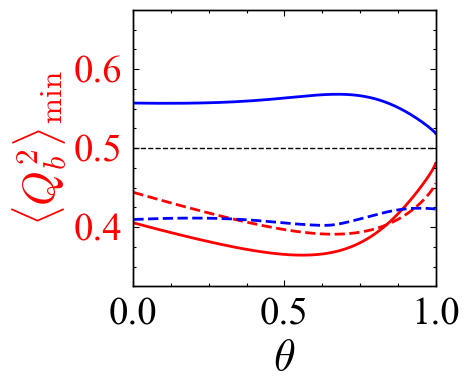

In [8]:
# all parameters
params = {
    'looper'    : {
        'show_progress' : True,
        'X' : {
            'var'   : 'theta',
            'min'   : 0.0,
            'max'   : 1.0,
            'dim'   : 1001
        }
    },
    'solver'    : {
        'show_progress' : False,
        'cache'         : True,
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 2),
        'method'        : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9371,
        't_range_max'   : 10001
    },
    'system': {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 50.0, 50.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.5,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter': {
        'type'                  : 'lines',
        'x_label'               : '$\\theta$',
        'x_ticks'               : [0.5 * i for i in range(3)],
        'x_ticks_minor'         : [0.125 * i for i in range(9)],
        'x_tick_labels'         : ['{:0.1f}'.format(0.5 * i) for i in range(3)],
        'y_colors'              : ['k'] + ['r'] * 2 + ['b'] * 2,
        'y_sizes'               : [1] + [2] * 4,
        'y_styles'              : ['--'] + ['--', '-'] * 2,
        'v_label'               : '$\\langle Q_{b}^{2} \\rangle_{\\mathrm{min}}$',
        'v_label_color'         : 'r',
        'v_limits'              : [0.325, 0.675],
        'v_tick_position'       : 'left-in',
        'v_ticks'               : [0.4, 0.5, 0.6],
        'v_ticks_minor'         : [0.325 + i * 0.025 for i in range(14)],
        'v_twin_label'          : '',
        'v_twin_label_color'    : 'b',
        'v_twin_limits'         : [-0.015, 0.195],
        'v_twin_tick_labels'    : [''] * 3,
        'v_twin_tick_position'  : 'right-in',
        'v_twin_ticks'          : [0.03, 0.09, 0.15],
        'v_twin_ticks_minor'    : [i * 0.015 for i in range(14)],
        'label_font_size'       : 32,
        'tick_font_size'        : 28,
        'width'                 : 4.8,
        'height'                : 4.0,
        'annotations'           : [{
            's': '(b)',
            'xy': [0.32, 0.82]
        }]
    }
}

# function to obtain squeezing and entanglement
def func(system_params):
    # initialize system
    system = OEM_20(
        params=system_params
    )

    # initialize solver
    hle_solver  = HLESolver(
        system=system,
        params=params['solver']
    )
    # get modes and correlations
    Modes, Corrs, T = hle_solver.get_modes_corrs_times_in_range()
    # get quantum correlation measures
    Measures = QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures()
    # extract maximum squeezing
    m_0 = np.min(Corrs[:, 2, 2])
    # extract maximum entanglement
    m_1 = np.max(Measures[:, 0])

    # return results as array
    return np.array([m_0, m_1], dtype=np.float_)

if __name__ == '__main__':
    # without voltage 
    params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3b_A_vs=[50.0, 0.0, 0.0]'
    params['system']['A_vs'] = [50.0, 0.0, 0.0]
    looper_0 = wrap_looper(
        looper_name='XLooper',
        func=func,
        params=params['looper'],
        params_system=params['system'],
        plot=False
    )
    Sq_0, En_0 = looper_0.results['V'].transpose()

    # with voltage modulation
    params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3b_A_vs=[50.0, 50.0, 50.0]'
    params['system']['A_vs'] = [50.0, 50.0, 50.0]
    looper_1 = wrap_looper(
        looper_name='XLooper',
        func=func,
        params=params['looper'],
        params_system=params['system'],
        plot=False
    )
    Sq_1, En_1 = looper_1.results['V'].transpose()

    # plotter
    X = looper_0.axes['X']['val']
    plotter = MPLPlotter(
        axes={},
        params=params['plotter']
    )
    # plot squeezing dynamics
    plotter.update(
        xs=X,
        vs=[np.zeros(np.shape(X)) + 0.5, Sq_0, Sq_1]
    )
    # plot entanglement dynamics
    plotter.update_twin_axis(
        xs=X,
        vs=[En_0, En_1]
    )
    # show
    plotter.show(
        hold=True
    )

MainThread               INFO    2023-06-25 23:58:47.502: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-06-25 23:58:47.506: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2023-06-25 23:58:47.507: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	


MainThread               INFO    2023-06-25 23:58:47.509: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


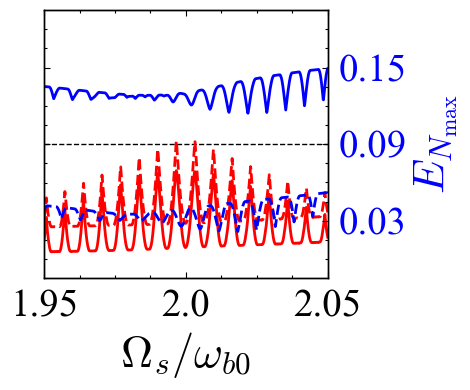

In [9]:
# all parameters
params = {
    'looper'    : {
        'show_progress' : True,
        'X' : {
            'var'   : 'Omegas',
            'idx'   : 2,
            'min'   : 1.95,
            'max'   : 2.05,
            'dim'   : 1001
        }
    },
    'solver'    : {
        'show_progress' : False,
        'cache'         : True,
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 2),
        'method'        : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_range_min'   : 9371,
        't_range_max'   : 10001
    },
    'system': {
        'A_ls'      : [100.0, 10.0, 10.0],
        'A_vs'      : [50.0, 50.0, 50.0], 
        'Delta_0'   : 1.0,
        'gammas'    : [0.1, 1e-6, 1e-2],
        'gs'        : [1e-3, 2e-4],
        'n_ths'     : [0.0, 0.0],
        'Omegas'    : [2.0, 2.0, 2.0],
        'omega_c0'  : 1.1,
        'theta'     : 0.5,
        't_mod'     : 'cos',
        't_pos'     : 'top'
    },
    'plotter': {
        'type'                  : 'lines',
        'x_label'               : '$\\Omega_{s} / \\omega_{b0}$',
        'x_ticks'               : [1.95 + i * 0.05 for i in range(3)],
        'x_ticks_minor'         : [1.95 + i * 0.0125 for i in range(9)],
        'y_colors'              : ['k'] + ['r'] * 2 + ['b'] * 2,
        'y_sizes'               : [1] + [2] * 4,
        'y_styles'              : ['--'] + ['--', '-'] * 2,
        'v_label'               : '',
        'v_label_color'         : 'r',
        'v_limits'              : [0.325, 0.675],
        'v_tick_labels'         : [''] * 3,
        'v_tick_position'       : 'left-in',
        'v_ticks'               : [0.4, 0.5, 0.6],
        'v_ticks_minor'         : [0.325 + i * 0.025 for i in range(14)],
        'v_twin_label'          : '$E_{N_{\\mathrm{max}}}$',
        'v_twin_label_color'    : 'b',
        'v_twin_limits'         : [-0.015, 0.195],
        'v_twin_tick_position'  : 'right-in',
        'v_twin_ticks'          : [0.03, 0.09, 0.15],
        'v_twin_ticks_minor'    : [i * 0.015 for i in range(14)],
        'label_font_size'       : 32,
        'tick_font_size'        : 28,
        'width'                 : 4.8,
        'height'                : 4.0,
        'annotations'           : [{
            's': '(c)',
            'xy': [0.13, 0.82]
        }]
    }
}

# function to obtain squeezing and entanglement
def func(system_params):
    # initialize system
    system = OEM_20(
        params=system_params
    )

    # initialize solver
    hle_solver  = HLESolver(
        system=system,
        params=params['solver']
    )
    # get modes and correlations
    Modes, Corrs, T = hle_solver.get_modes_corrs_times_in_range()
    # get quantum correlation measures
    Measures = QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures()
    # extract maximum squeezing
    m_0 = np.min(Corrs[:, 2, 2])
    # extract maximum entanglement
    m_1 = np.max(Measures[:, 0])

    # return results as array
    return np.array([m_0, m_1], dtype=np.float_)

if __name__ == '__main__':
    # without voltage modulation
    params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3c_A_vs=[50.0, 0.0, 0.0]'
    params['system']['A_vs'] = [50.0, 0.0, 0.0]
    looper_0 = wrap_looper(
        looper_name='XLooper',
        func=func,
        params=params['looper'],
        params_system=params['system'],
        plot=False
    )
    Sq_0, En_0 = looper_0.results['V'].transpose()

    # with voltage modulation
    params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3c_A_vs=[50.0, 50.0, 50.0]'
    params['system']['A_vs'] = [50.0, 50.0, 50.0]
    looper_1 = wrap_looper(
        looper_name='XLooper',
        func=func,
        params=params['looper'],
        params_system=params['system'],
        plot=False
    )
    Sq_1, En_1 = looper_1.results['V'].transpose()

    # plotter
    X = looper_0.axes['X']['val']
    plotter = MPLPlotter(
        axes={},
        params=params['plotter']
    )
    # plot squeezing dynamics
    plotter.update(
        xs=X,
        vs=[np.zeros(np.shape(X)) + 0.5, Sq_0, Sq_1]
    )
    # plot entanglement dynamics
    plotter.update_twin_axis(
        xs=X,
        vs=[En_0, En_1]
    )
    # show
    plotter.show(
        hold=True
    )